# <font color="blue"><h3 align="center">ABC Ltd. Employee Performance - Project</h3></font>

1. Department wise performances
2. Top 3 Important Factors effecting employee performance
3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
4. Recommendations to improve the employee performance based on insights from analysis.

ABC Ltd. (referred as ABC), is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. ABC is consistently rated as top 20 best employers past 5 years. ABC human resource policies are considered as employee friendly and widely perceived as best practices in the industry.

# Ignore Warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

# import basic libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the excel file

In [3]:
df=pd.read_excel('data_ABC.xls')
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [4]:
df.shape

(1200, 28)

# Info of all columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

# Check Skiwness

In [6]:
df.skew()

Age                             0.384145
DistanceFromHome                0.962956
EmpEducationLevel              -0.250974
EmpEnvironmentSatisfaction     -0.307665
EmpHourlyRate                  -0.035165
EmpJobInvolvement              -0.557846
EmpJobLevel                     1.024053
EmpJobSatisfaction             -0.324276
NumCompaniesWorked              1.048635
EmpLastSalaryHikePercent        0.808654
EmpRelationshipSatisfaction    -0.318563
TotalWorkExperienceInYears      1.086862
TrainingTimesLastYear           0.532073
EmpWorkLifeBalance             -0.539231
ExperienceYearsAtThisCompany    1.789055
ExperienceYearsInCurrentRole    0.888159
YearsSinceLastPromotion         1.974932
YearsWithCurrManager            0.813158
PerformanceRating              -0.070576
dtype: float64

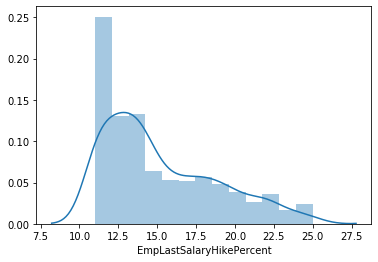

In [7]:
sns.distplot(df.EmpLastSalaryHikePercent)

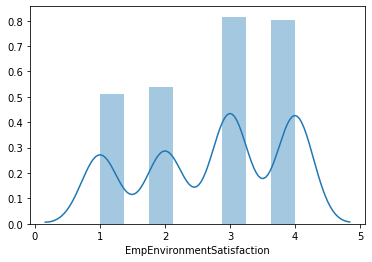

In [8]:
sns.distplot(df.EmpEnvironmentSatisfaction)

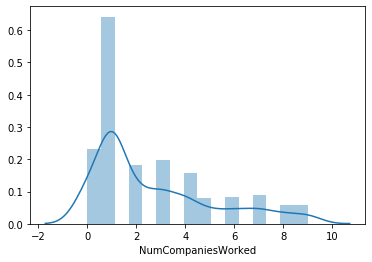

In [9]:
sns.distplot(df.NumCompaniesWorked)

* Discrit data

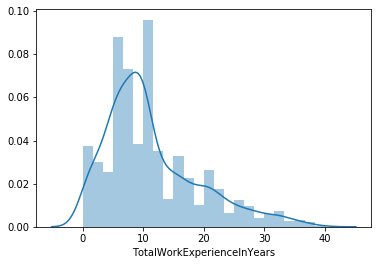

In [10]:
sns.distplot(df.TotalWorkExperienceInYears)

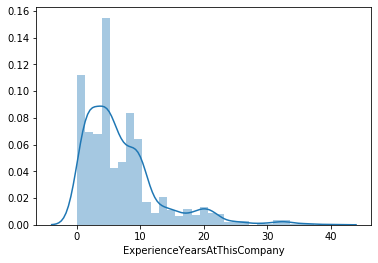

In [11]:
sns.distplot(df.ExperienceYearsAtThisCompany)

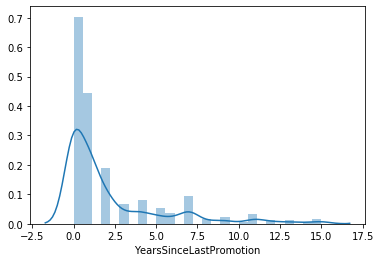

In [12]:
sns.distplot(df.YearsSinceLastPromotion)

# Check null values

In [13]:
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

* No null values are there

# Check description

In [14]:
df.describe([0.015,0.25,0.5,0.75,0.997])

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
1.5%,20.000000,1.000000,1.00000,1.000000,31.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
99.7%,59.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,37.000000,6.000000,4.000000,34.806000,17.000000,15.000000,17.000000,4.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


* We cannot remove any row because there are very less number of rows are there and not so much outliers are there

# Dummy columns

In [15]:
df['EducationBackground'].value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

In [16]:
df['EmpDepartment'].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [17]:
df.BusinessTravelFrequency.value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

In [18]:
df1=df.drop(['EmpNumber'],1)

In [19]:
df1=pd.get_dummies(df1,drop_first=True)

In [20]:
df1.shape

(1200, 54)

In [21]:
df1.columns

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating', 'Gender_Male',
       'EducationBackground_Life Sciences', 'EducationBackground_Marketing',
       'EducationBackground_Medical', 'EducationBackground_Other',
       'EducationBackground_Technical Degree', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'EmpDepartment_Development',
       'EmpDepartment_Finance', 'EmpDepartment_Human Resources',
       'EmpDepartment_Research & Development', 'EmpDepartment_Sales',
       'EmpJobRole_Data Scientist', 'EmpJobRole_Delivery Manager',
    

# Split into test and train

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X=df1.drop('PerformanceRating',axis=1)
y=df1.PerformanceRating

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

# Scalling

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [26]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

# Correlation

In [27]:
df1.corr()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,...,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_Yes,Attrition_Yes
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.006105,...,-0.018004,-0.175906,-0.002592,0.005966,-0.024610,0.033584,-0.033992,0.044678,0.051910,-0.189317
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.044974,...,0.024471,-0.029538,0.030235,0.028001,-0.001554,-0.010074,-0.028573,-0.003420,0.024940,0.063248
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.002358,...,0.059322,-0.104893,-0.040823,0.047522,-0.002595,-0.017851,-0.016728,0.008658,-0.021119,-0.049118
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,...,-0.033454,-0.011140,0.055478,-0.018835,0.040043,0.047139,-0.019519,0.017441,0.064270,-0.123490
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.015934,...,-0.029836,-0.010053,-0.012165,-0.021431,-0.055720,0.022542,-0.017095,0.026186,-0.032636,-0.026313
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.001742,...,-0.018492,-0.037905,0.034471,-0.010346,0.013597,0.055183,0.047272,-0.007729,-0.011069,-0.153360
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.020975,...,0.123940,-0.218709,-0.001885,-0.000085,-0.044196,-0.015320,-0.021289,0.036130,0.030012,-0.175763
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.031847,...,0.018543,-0.001765,0.014543,-0.006731,-0.001268,0.018012,0.033905,-0.037686,0.022315,-0.081783
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.011788,...,-0.008529,-0.108600,0.010645,0.021347,-0.042803,0.068886,-0.030979,0.029175,-0.013888,0.037643
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,...,-0.028673,0.015454,0.003873,0.007579,-0.034895,0.024350,-0.012669,-0.025831,-0.000778,-0.009448


# RFE

In [28]:
from sklearn.linear_model import LogisticRegression
lgr_model=LogisticRegression()

In [29]:
from sklearn.feature_selection import RFE
rfe=RFE(lgr_model,40)

In [30]:
rfe.fit(X_train_scaled,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=40, step=1, verbose=0)

In [31]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', True, 1),
 ('DistanceFromHome', True, 1),
 ('EmpEducationLevel', True, 1),
 ('EmpEnvironmentSatisfaction', True, 1),
 ('EmpHourlyRate', False, 11),
 ('EmpJobInvolvement', True, 1),
 ('EmpJobLevel', True, 1),
 ('EmpJobSatisfaction', False, 12),
 ('NumCompaniesWorked', True, 1),
 ('EmpLastSalaryHikePercent', True, 1),
 ('EmpRelationshipSatisfaction', True, 1),
 ('TotalWorkExperienceInYears', True, 1),
 ('TrainingTimesLastYear', False, 7),
 ('EmpWorkLifeBalance', True, 1),
 ('ExperienceYearsAtThisCompany', True, 1),
 ('ExperienceYearsInCurrentRole', True, 1),
 ('YearsSinceLastPromotion', True, 1),
 ('YearsWithCurrManager', True, 1),
 ('Gender_Male', False, 14),
 ('EducationBackground_Life Sciences', True, 1),
 ('EducationBackground_Marketing', True, 1),
 ('EducationBackground_Medical', True, 1),
 ('EducationBackground_Other', False, 3),
 ('EducationBackground_Technical Degree', True, 1),
 ('MaritalStatus_Married', False, 9),
 ('MaritalStatus_Single', True, 1),
 ('EmpDepartment_De

# Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression
lgr_model=LogisticRegression()

### Train data

In [33]:
lgr_model.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_train_lgr_pred=lgr_model.predict(X_train_scaled)

In [35]:
from sklearn import metrics

In [36]:
print(metrics.classification_report(y_train,y_train_lgr_pred))

              precision    recall  f1-score   support

           2       0.75      0.61      0.67       142
           3       0.86      0.94      0.90       598
           4       0.84      0.58      0.69       100

    accuracy                           0.84       840
   macro avg       0.82      0.71      0.75       840
weighted avg       0.84      0.84      0.84       840



In [37]:
metrics.confusion_matrix(y_train,y_train_lgr_pred)

array([[ 87,  54,   1],
       [ 25, 563,  10],
       [  4,  38,  58]], dtype=int64)

In [38]:
metrics.accuracy_score(y_train,y_train_lgr_pred)

0.8428571428571429

### Test data

In [39]:
lgr_model.fit(X_test_scaled,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_test_lgr_pred=lgr_model.predict(X_test_scaled)

In [41]:
print(metrics.classification_report(y_test,y_test_lgr_pred))

              precision    recall  f1-score   support

           2       0.84      0.73      0.78        52
           3       0.91      0.96      0.93       276
           4       0.83      0.59      0.69        32

    accuracy                           0.89       360
   macro avg       0.86      0.76      0.80       360
weighted avg       0.89      0.89      0.89       360



In [42]:
metrics.confusion_matrix(y_test,y_test_lgr_pred)

array([[ 38,  14,   0],
       [  7, 265,   4],
       [  0,  13,  19]], dtype=int64)

In [43]:
metrics.accuracy_score(y_test,y_test_lgr_pred)

0.8944444444444445

# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn_class=KNeighborsClassifier(n_neighbors=10)

### Train data

In [45]:
knn_class.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [46]:
y_train_knn_pred=knn_class.predict(X_train_scaled)

In [47]:
print(metrics.classification_report(y_train,y_train_knn_pred))

              precision    recall  f1-score   support

           2       0.70      0.22      0.33       142
           3       0.75      0.98      0.85       598
           4       0.90      0.09      0.16       100

    accuracy                           0.75       840
   macro avg       0.78      0.43      0.45       840
weighted avg       0.76      0.75      0.68       840



In [48]:
metrics.confusion_matrix(y_train,y_train_knn_pred)

array([[ 31, 111,   0],
       [  9, 588,   1],
       [  4,  87,   9]], dtype=int64)

In [49]:
metrics.accuracy_score(y_train,y_train_knn_pred)

0.7476190476190476

### Test data

In [50]:
knn_class.fit(X_test_scaled,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [51]:
y_test_knn_pred=knn_class.predict(X_test_scaled)

In [52]:
print(metrics.classification_report(y_test,y_test_knn_pred))

              precision    recall  f1-score   support

           2       0.75      0.17      0.28        52
           3       0.78      0.99      0.87       276
           4       0.00      0.00      0.00        32

    accuracy                           0.78       360
   macro avg       0.51      0.39      0.39       360
weighted avg       0.71      0.78      0.71       360



In [53]:
metrics.confusion_matrix(y_test,y_test_knn_pred)

array([[  9,  43,   0],
       [  3, 273,   0],
       [  0,  32,   0]], dtype=int64)

In [54]:
metrics.accuracy_score(y_test,y_test_knn_pred)

0.7833333333333333

# Naive-bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
nbm=GaussianNB()

### Train data

In [56]:
nbm.fit(X_train_scaled,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
y_train_nbg_pred=nbm.predict(X_train_scaled)

In [58]:
print(metrics.classification_report(y_train,y_train_nbg_pred))

              precision    recall  f1-score   support

           2       0.35      0.43      0.38       142
           3       1.00      0.02      0.04       598
           4       0.15      0.97      0.26       100

    accuracy                           0.20       840
   macro avg       0.50      0.47      0.23       840
weighted avg       0.79      0.20      0.12       840



In [59]:
metrics.confusion_matrix(y_train,y_train_nbg_pred)

array([[ 61,   0,  81],
       [112,  11, 475],
       [  3,   0,  97]], dtype=int64)

In [60]:
metrics.accuracy_score(y_train,y_train_nbg_pred)

0.2011904761904762

# Decission Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=101)

## Gini

### Train data

In [62]:
clf_gini.fit(X_train_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [63]:
y_train_dtg_pred=clf_gini.predict(X_train_scaled)

In [64]:
print(metrics.classification_report(y_train,y_train_dtg_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       142
           3       1.00      1.00      1.00       598
           4       1.00      1.00      1.00       100

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840



In [65]:
metrics.confusion_matrix(y_train,y_train_dtg_pred)

array([[142,   0,   0],
       [  0, 598,   0],
       [  0,   0, 100]], dtype=int64)

In [66]:
metrics.accuracy_score(y_train,y_train_dtg_pred)

1.0

### Test data

In [67]:
clf_gini.fit(X_test_scaled,y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [68]:
y_test_dtg_pred=clf_gini.predict(X_test_scaled)

In [69]:
print(metrics.classification_report(y_test,y_test_dtg_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00       276
           4       1.00      1.00      1.00        32

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



In [70]:
metrics.confusion_matrix(y_test,y_test_dtg_pred)

array([[ 52,   0,   0],
       [  0, 276,   0],
       [  0,   0,  32]], dtype=int64)

In [71]:
metrics.accuracy_score(y_test,y_test_dtg_pred)

1.0

## Entropy

In [72]:
clf_entropy=DecisionTreeClassifier(criterion='entropy',random_state=101)

### Train Data

In [73]:
clf_entropy.fit(X_train_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [74]:
y_train_dte_pred=clf_entropy.predict(X_train_scaled)

In [75]:
print(metrics.classification_report(y_train,y_train_dte_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       142
           3       1.00      1.00      1.00       598
           4       1.00      1.00      1.00       100

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840



In [76]:
metrics.confusion_matrix(y_train,y_train_dte_pred)

array([[142,   0,   0],
       [  0, 598,   0],
       [  0,   0, 100]], dtype=int64)

In [77]:
metrics.accuracy_score(y_train,y_train_dte_pred)

1.0

### Test data

In [78]:
clf_entropy.fit(X_test_scaled,y_test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [79]:
y_test_dte_pred=clf_entropy.predict(X_test_scaled)

In [80]:
print(metrics.classification_report(y_test,y_test_dte_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00       276
           4       1.00      1.00      1.00        32

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



In [81]:
metrics.confusion_matrix(y_test,y_test_dte_pred)

array([[ 52,   0,   0],
       [  0, 276,   0],
       [  0,   0,  32]], dtype=int64)

In [82]:
metrics.accuracy_score(y_test,y_test_dte_pred)

1.0

# Random forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf_model=RandomForestClassifier(n_estimators=40,random_state=101)

### Train data

In [85]:
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [86]:
y_train_rf_pred=rf_model.predict(X_train_scaled)

In [87]:
print(metrics.classification_report(y_train,y_train_rf_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       142
           3       1.00      1.00      1.00       598
           4       1.00      1.00      1.00       100

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840



In [88]:
metrics.confusion_matrix(y_train,y_train_rf_pred)

array([[142,   0,   0],
       [  0, 598,   0],
       [  0,   0, 100]], dtype=int64)

In [89]:
metrics.accuracy_score(y_train,y_train_rf_pred)

1.0

### Test data

In [90]:
rf_model.fit(X_test_scaled,y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [91]:
y_test_rf_pred=rf_model.predict(X_test_scaled)

In [92]:
print(metrics.classification_report(y_test,y_test_rf_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00       276
           4       1.00      1.00      1.00        32

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



In [93]:
metrics.confusion_matrix(y_test,y_test_rf_pred)

array([[ 52,   0,   0],
       [  0, 276,   0],
       [  0,   0,  32]], dtype=int64)

In [94]:
metrics.accuracy_score(y_test,y_test_rf_pred)

1.0

# Xgboost

In [95]:
from xgboost import XGBClassifier
classifire=XGBClassifier()

### Train data

In [96]:
classifire.fit(X_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [97]:
y_train_xgb_pred=classifire.predict(X_train_scaled)

In [98]:
print(metrics.classification_report(y_train,y_train_xgb_pred))

              precision    recall  f1-score   support

           2       0.92      0.99      0.95       142
           3       0.99      0.98      0.99       598
           4       1.00      0.97      0.98       100

    accuracy                           0.98       840
   macro avg       0.97      0.98      0.97       840
weighted avg       0.98      0.98      0.98       840



In [99]:
metrics.confusion_matrix(y_train,y_train_xgb_pred)

array([[140,   2,   0],
       [ 12, 586,   0],
       [  0,   3,  97]], dtype=int64)

In [100]:
metrics.accuracy_score(y_train,y_train_xgb_pred)

0.9797619047619047

# Test data

In [101]:
classifire.fit(X_test_scaled,y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [102]:
y_test_xgb_pred=classifire.predict(X_test_scaled)

In [103]:
print(metrics.classification_report(y_test,y_test_xgb_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00       276
           4       1.00      1.00      1.00        32

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



In [104]:
metrics.confusion_matrix(y_test,y_test_xgb_pred)

array([[ 52,   0,   0],
       [  0, 276,   0],
       [  0,   0,  32]], dtype=int64)

In [105]:
metrics.accuracy_score(y_test,y_test_xgb_pred)

1.0

# Visualization

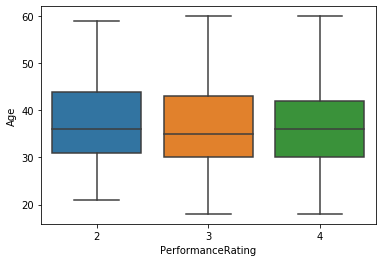

In [106]:
sns.boxplot(x=df.PerformanceRating,y=df.Age)

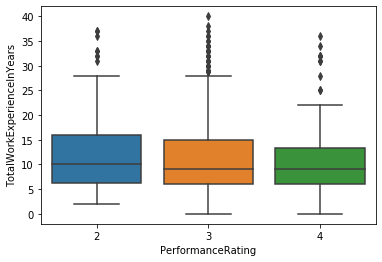

In [107]:
sns.boxplot(x=df.PerformanceRating,y=df.TotalWorkExperienceInYears)

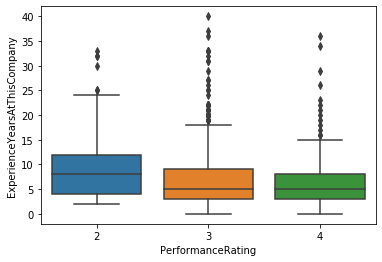

In [108]:
sns.boxplot(x=df.PerformanceRating,y=df.ExperienceYearsAtThisCompany)

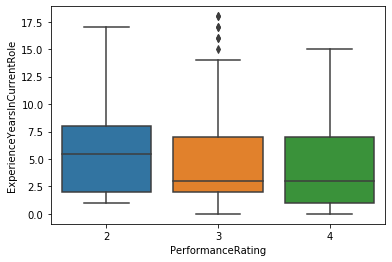

In [109]:
sns.boxplot(x=df.PerformanceRating,y=df.ExperienceYearsInCurrentRole)

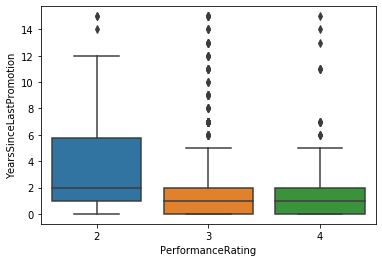

In [110]:
sns.boxplot(x=df.PerformanceRating,y=df.YearsSinceLastPromotion)

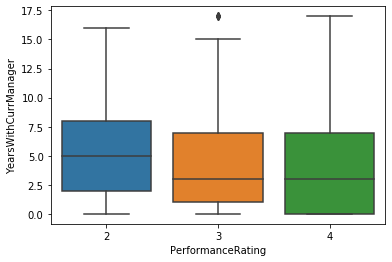

In [111]:
sns.boxplot(x=df.PerformanceRating,y=df.YearsWithCurrManager)

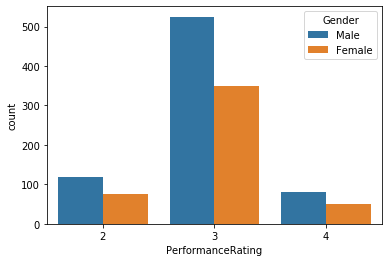

In [112]:
sns.countplot(x=df.PerformanceRating, hue=df.Gender)

ValueError: `bins` must increase monotonically, when an array

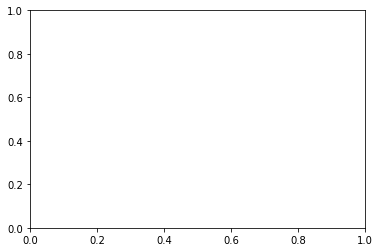

In [113]:

df.Age.plot.hist(df.PerformanceRating)
plt.xlabel('Age')

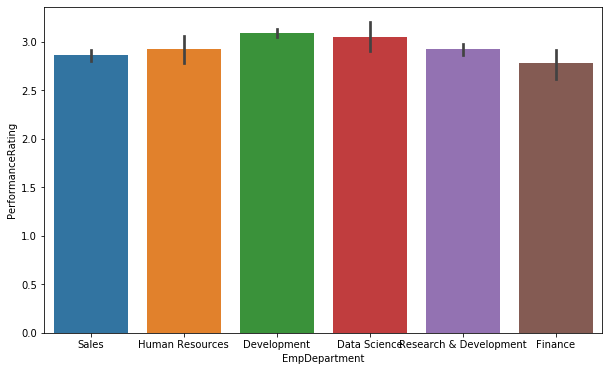

In [115]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x=df.EmpDepartment,y=df.PerformanceRating,estimator=np.mean)

In [116]:
#
df.groupby('EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

Text(0, 0.5, 'PerformanceRating')

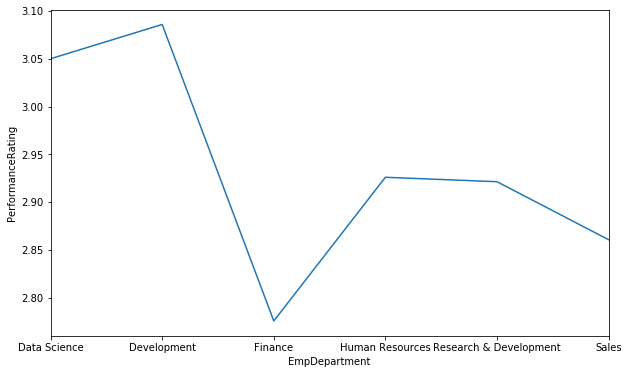

In [162]:
plt.figure(figsize=(10,6))
df.groupby('EmpDepartment')['PerformanceRating'].mean().plot()
plt.ylabel('PerformanceRating')

In [118]:
df1['PerformanceRating'].corr()

TypeError: corr() missing 1 required positional argument: 'other'

In [119]:
#Top 3 Important Factors effecting employee performance
feature_importance=pd.DataFrame(data=rf_model.feature_importances_*100, columns=['GiniValue'])
feature_importance=feature_importance.set_index(X.columns)
feature_importance.sort_values(['GiniValue'],ascending=False,inplace=True)
feature_importance.head(10)


,GiniValue
EmpLastSalaryHikePercent,18.574452
EmpEnvironmentSatisfaction,11.717602
YearsSinceLastPromotion,6.251312
Age,4.609265
EmpHourlyRate,4.318447
ExperienceYearsInCurrentRole,3.636741
TotalWorkExperienceInYears,3.588947
ExperienceYearsAtThisCompany,3.451219
DistanceFromHome,3.421446
YearsWithCurrManager,2.840181


In [120]:
len(feature_importance.index)

53

ValueError: too many values to unpack (expected 2)

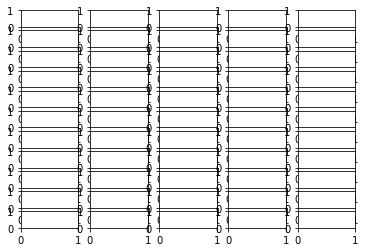

In [121]:
plt.subplots(11,5)
sub=[]
for i, name in list(feature_importance.index):
    plt.subplot(11,5,i)
    ax=sns.boxplot(df.PerformanceRating,df[name])
    sub.append(ax)

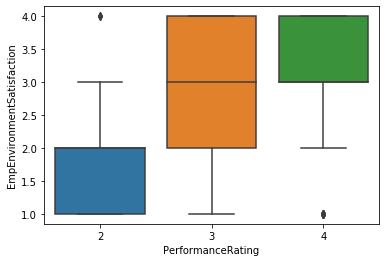

In [122]:
sns.boxplot(df.PerformanceRating,df.EmpEnvironmentSatisfaction)

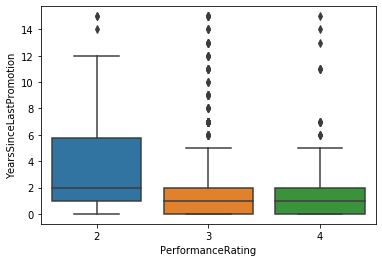

In [123]:
sns.boxplot(df.PerformanceRating,df.YearsSinceLastPromotion)

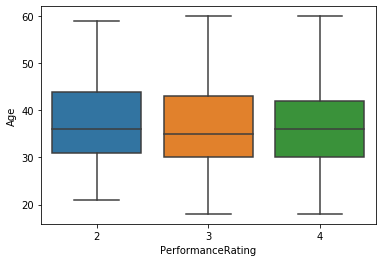

In [124]:
sns.boxplot(df.PerformanceRating,df.Age)

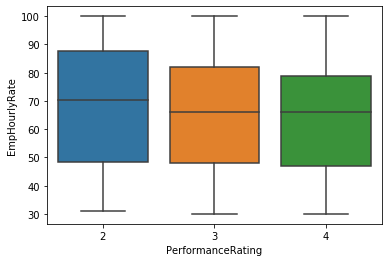

In [125]:
sns.boxplot(df.PerformanceRating,df.EmpHourlyRate)

In [126]:
sns.boxplot

<function seaborn.categorical.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)>

TypeError: cannot perform reduce with flexible type

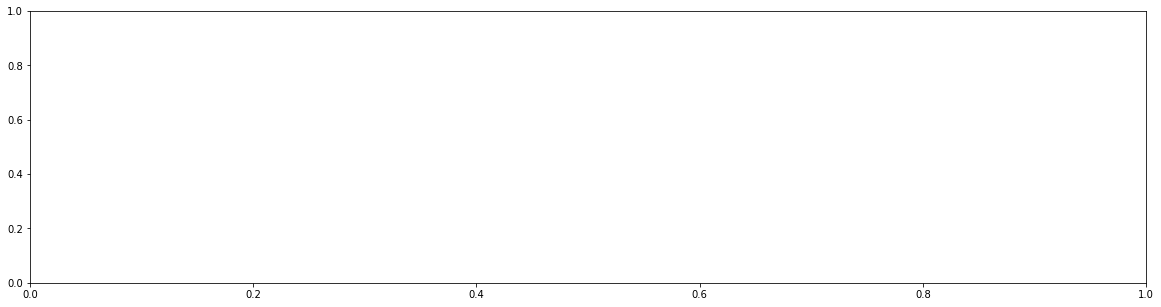

In [170]:
fig=plt.figure(figsize=(20,5))
sns.boxplot(df.EmpDepartment)

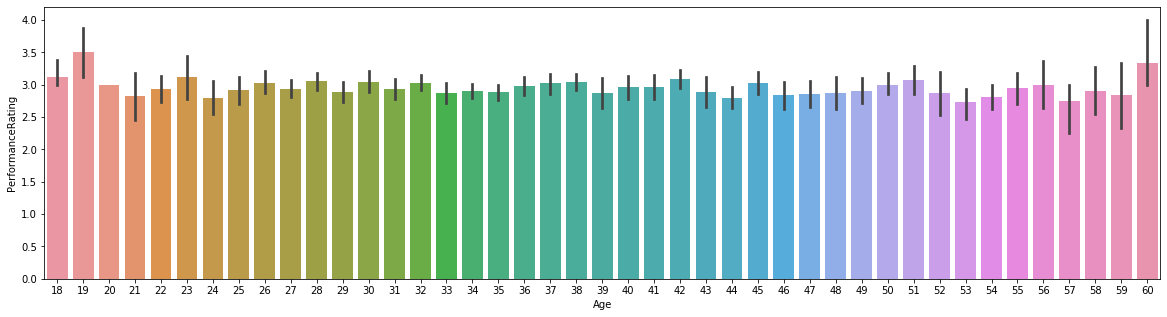

In [128]:
fig=plt.figure(figsize=(20,5))
sns.barplot(x=df.Age, y=df.PerformanceRating, estimator=np.mean)

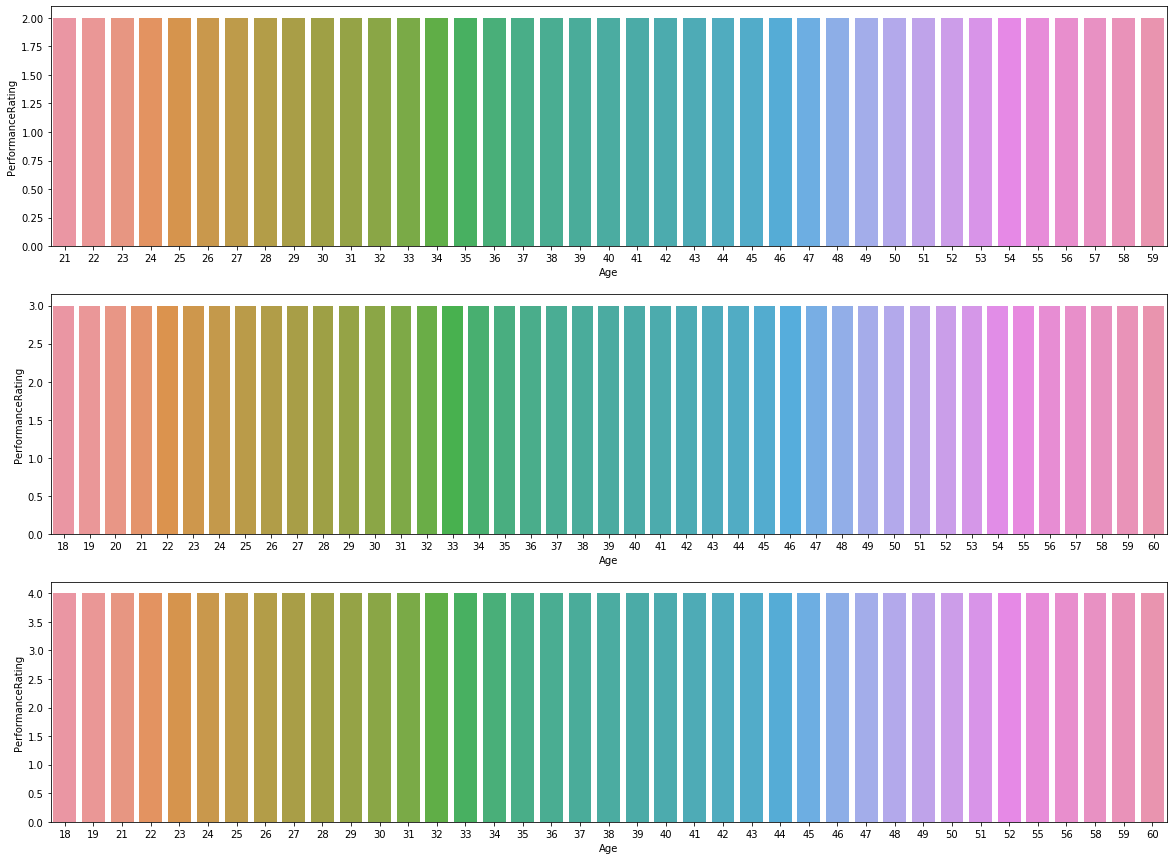

In [169]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.barplot(x=df[df.PerformanceRating==2].Age,y=df.PerformanceRating)
plt.subplot(3,1,2)
sns.barplot(x=df[df.PerformanceRating==3].Age,y=df.PerformanceRating)
plt.subplot(3,1,3)
sns.barplot(x=df[df.PerformanceRating==4].Age,y=df.PerformanceRating)

In [130]:
plt.pie(df.PerformanceRating,df.Age)

([<matplotlib.patches.Wedge at 0x15bc5ca88d0>,
  ...],
 [Text(33.0998825577624, 0.0881740457075647, ''),
  Text(48.09846403310757, 0.3843925803890262, ''),
  Text(41.09585209722912, 0.5839010212948623, ''),
  Text(42.091220358877784, 0.8597492078462236, ''),
  Text(61.07974336537448, 1.5731975146152988, ''),
  Text(28.0856441659411, 0.8981045507838531, ''),
  Text(51.062755757880986, 1.9506343611740877, ''),
  Text(29.072459569530007, 1.2657387479425506, ''),
  Text(37.05576489578431, 1.811156533367321, ''),
  Text(39.04265648239317, 2.1168313106722016, ''),
  Text(45.02020932626789, 2.6815577970689883, ''),
  Text(47.99898338561208, 3.115701196799183, ''),
  Text(31.021564654645605, 2.20737998034834, ''),
  Text(30.010227547207897, 2.3229813957077554, ''),
  Text(42.95312413581528, 3.5551549858258906, ''),
  Text(34.964464864164704, 3.0815899731456544, ''),
  Text(39.925834381145776, 3.733329475055452, ''),
  Text(56.82286936698316, 5.61885370006792, ''),
  Text(40.87459551394609, 4.2

In [131]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [132]:
100*df.PerformanceRating.value_counts()/len(df)

3    72.833333
2    16.166667
4    11.000000
Name: PerformanceRating, dtype: float64

In [133]:
100*df[df.PerformanceRating==2].EmpDepartment.value_counts()/len(df[df.PerformanceRating==2])

Sales                     44.845361
Research & Development    35.051546
Finance                    7.731959
Development                6.701031
Human Resources            5.154639
Data Science               0.515464
Name: EmpDepartment, dtype: float64

In [134]:
100*df[df.PerformanceRating==3].EmpDepartment.value_counts()/len(df[df.PerformanceRating==3])

Development               34.782609
Sales                     28.718535
Research & Development    26.773455
Human Resources            4.347826
Finance                    3.432494
Data Science               1.945080
Name: EmpDepartment, dtype: float64

In [135]:
100*df[df.PerformanceRating==4].EmpDepartment.value_counts()/len(df[df.PerformanceRating==4])

Development               33.333333
Research & Development    31.060606
Sales                     26.515152
Human Resources            4.545455
Finance                    3.030303
Data Science               1.515152
Name: EmpDepartment, dtype: float64

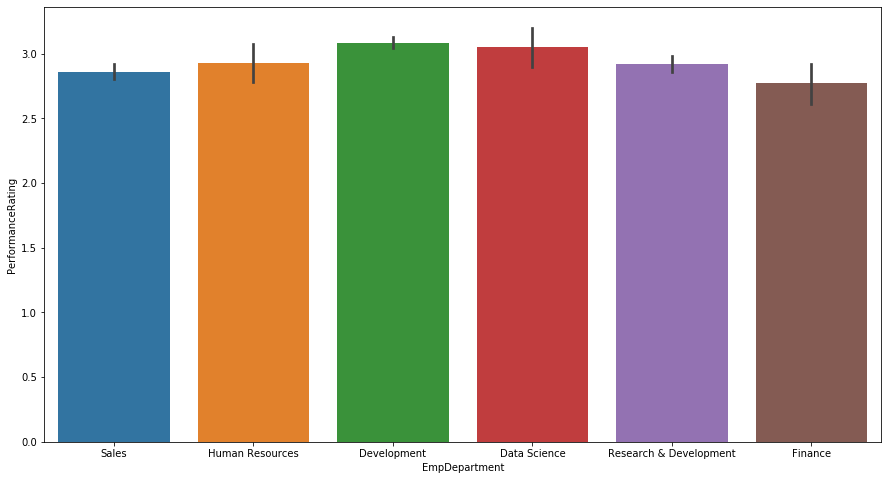

In [138]:
plt.figure(figsize=(15,8))
sns.barplot(x=df.EmpDepartment,y=df.PerformanceRating, estimator=np.mean)

In [139]:
100*df[df.PerformanceRating==2].EducationBackground.value_counts()/len(df[df.PerformanceRating==2])

Life Sciences       40.206186
Medical             32.474227
Marketing           14.948454
Technical Degree     9.278351
Human Resources      1.546392
Other                1.546392
Name: EducationBackground, dtype: float64

In [140]:
100*df[df.PerformanceRating==3].EducationBackground.value_counts()/len(df[df.PerformanceRating==3])

Life Sciences       40.846682
Medical             32.151030
Marketing           10.755149
Technical Degree     8.009153
Other                6.407323
Human Resources      1.830664
Name: EducationBackground, dtype: float64

In [141]:
100*df[df.PerformanceRating==4].EducationBackground.value_counts()/len(df[df.PerformanceRating==4])

Life Sciences       43.181818
Medical             30.303030
Marketing           10.606061
Technical Degree     9.090909
Other                5.303030
Human Resources      1.515152
Name: EducationBackground, dtype: float64

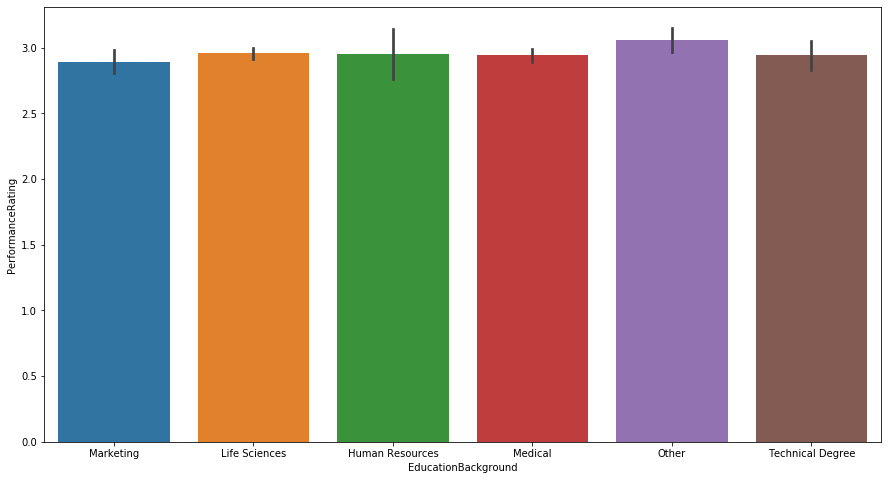

In [143]:
plt.figure(figsize=(15,8))
sns.barplot(x=df.EducationBackground,y=df.PerformanceRating,estimator=np.mean)

## Employee_Job_Role

In [144]:
100*df[df.PerformanceRating==2].EmpJobRole.value_counts()/len(df[df.PerformanceRating==2])

Sales Executive              32.989691
Research Scientist            8.762887
Manager R&D                   8.762887
Finance Manager               7.731959
Laboratory Technician         7.216495
Manager                       6.185567
Sales Representative          6.185567
Human Resources               4.639175
Healthcare Representative     4.123711
Senior Developer              3.092784
Developer                     3.092784
Research Director             2.577320
Senior Manager R&D            2.061856
Manufacturing Director        1.546392
Data Scientist                0.515464
Technical Lead                0.515464
Name: EmpJobRole, dtype: float64

In [145]:
100*df[df.PerformanceRating==3].EmpJobRole.value_counts()/len(df[df.PerformanceRating==3])

Developer                    22.768879
Sales Executive              20.709382
Manager R&D                   7.551487
Sales Representative          6.178490
Research Scientist            5.263158
Laboratory Technician         5.148741
Senior Developer              4.576659
Technical Lead                3.775744
Human Resources               3.546911
Finance Manager               3.432494
Manager                       3.318078
Manufacturing Director        3.203661
Healthcare Representative     2.517162
Data Scientist                1.945080
Business Analyst              1.487414
Delivery Manager              1.372998
Research Director             1.258581
Senior Manager R&D            1.144165
Technical Architect           0.800915
Name: EmpJobRole, dtype: float64

In [146]:
100*df[df.PerformanceRating==4].EmpJobRole.value_counts()/len(df[df.PerformanceRating==4])

Developer                    23.484848
Sales Executive              18.939394
Research Scientist           10.606061
Manager R&D                   8.333333
Manager                       7.575758
Senior Developer              4.545455
Human Resources               3.787879
Laboratory Technician         3.787879
Technical Lead                3.030303
Finance Manager               3.030303
Healthcare Representative     2.272727
Sales Representative          2.272727
Business Analyst              2.272727
Research Director             2.272727
Manufacturing Director        1.515152
Data Scientist                1.515152
Senior Manager R&D            0.757576
Name: EmpJobRole, dtype: float64

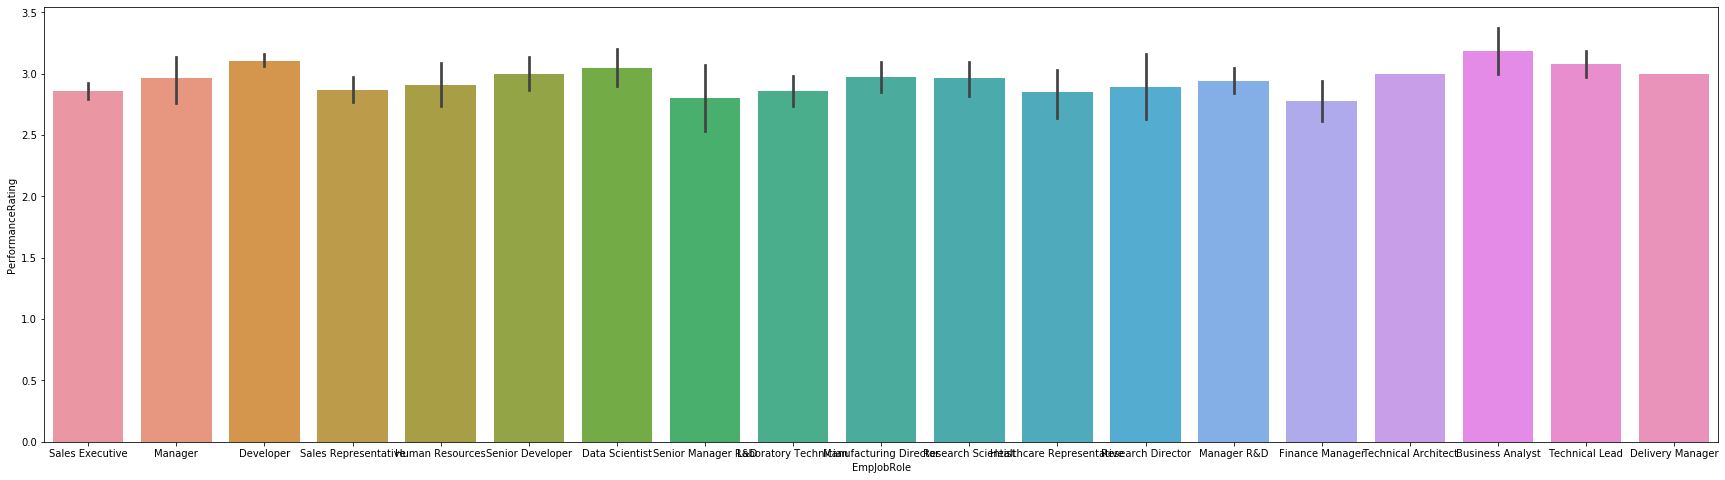

In [148]:
plt.figure(figsize=(30,8))
sns.barplot(x=df.EmpJobRole,y=df.PerformanceRating,estimator=np.mean)

## EmpLastSalaryHikePercent

In [164]:
df.EmpLastSalaryHikePercent.value_counts()

14    172
11    169
13    168
12    155
15     82
18     73
16     68
17     67
19     63
20     50
22     47
21     34
23     21
24     18
25     13
Name: EmpLastSalaryHikePercent, dtype: int64

In [149]:
100*df[df.PerformanceRating==2].EmpLastSalaryHikePercent.value_counts()/len(df[df.PerformanceRating==2])

12    15.463918
14    14.432990
11    14.432990
13    13.917526
16     6.185567
15     5.670103
19     5.154639
18     5.154639
20     4.639175
17     4.639175
22     3.608247
23     2.061856
21     2.061856
25     1.546392
24     1.030928
Name: EmpLastSalaryHikePercent, dtype: float64

In [150]:
100*df[df.PerformanceRating==3].EmpLastSalaryHikePercent.value_counts()/len(df[df.PerformanceRating==3])

14    16.018307
11    16.018307
13    15.789474
12    14.073227
15     7.665904
18     7.208238
17     6.292906
16     6.178490
19     5.835240
20     1.601831
22     1.487414
21     0.686499
24     0.572082
25     0.343249
23     0.228833
Name: EmpLastSalaryHikePercent, dtype: float64

In [151]:
100*df[df.PerformanceRating==4].EmpLastSalaryHikePercent.value_counts()/len(df[df.PerformanceRating==4])

22    20.454545
20    20.454545
21    18.181818
23    11.363636
24     8.333333
25     5.303030
15     3.030303
14     3.030303
17     2.272727
13     2.272727
19     1.515152
16     1.515152
12     1.515152
11     0.757576
Name: EmpLastSalaryHikePercent, dtype: float64

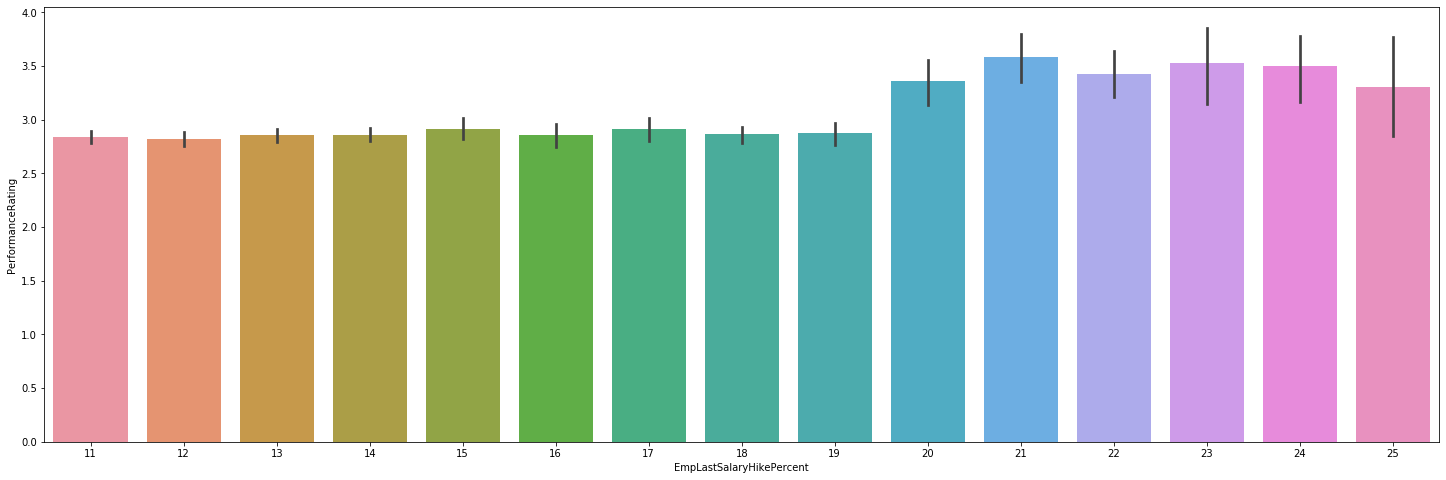

In [152]:
plt.figure(figsize=(25,8))
sns.barplot(x=df.EmpLastSalaryHikePercent,y=df.PerformanceRating,estimator=np.mean)

## Environmental Satisfection

In [153]:
100*df[df.PerformanceRating==2].EmpEnvironmentSatisfaction.value_counts()/len(df[df.PerformanceRating==2])

2    50.515464
1    46.391753
4     1.546392
3     1.546392
Name: EmpEnvironmentSatisfaction, dtype: float64

In [154]:
100*df[df.PerformanceRating==3].EmpEnvironmentSatisfaction.value_counts()/len(df[df.PerformanceRating==3])

3    35.469108
4    35.125858
2    14.874142
1    14.530892
Name: EmpEnvironmentSatisfaction, dtype: float64

In [155]:
100*df[df.PerformanceRating==4].EmpEnvironmentSatisfaction.value_counts()/len(df[df.PerformanceRating==4])

3    40.909091
4    38.636364
2    10.606061
1     9.848485
Name: EmpEnvironmentSatisfaction, dtype: float64

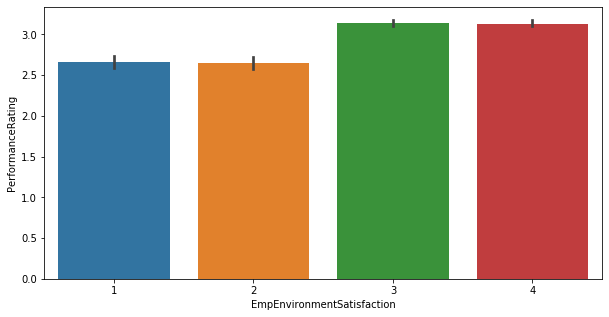

In [156]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.EmpEnvironmentSatisfaction,y=df.PerformanceRating,estimator=np.mean)

## YearsSinceLastPromotion

In [157]:
100*df[df.PerformanceRating==2].YearsSinceLastPromotion.value_counts()/len(df[df.PerformanceRating==2])

1     34.020619
2     19.072165
7      7.731959
3      7.731959
4      7.216495
5      5.154639
11     4.123711
6      4.123711
9      2.577320
8      2.577320
12     1.546392
0      1.546392
15     1.030928
10     1.030928
14     0.515464
Name: YearsSinceLastPromotion, dtype: float64

In [158]:
100*df[df.PerformanceRating==3].YearsSinceLastPromotion.value_counts()/len(df[df.PerformanceRating==3])

0     46.338673
1     22.311213
2      9.496568
7      4.691076
4      4.233410
3      2.860412
5      2.402746
6      1.372998
11     1.258581
9      1.258581
15     0.915332
13     0.800915
12     0.686499
8      0.686499
14     0.343249
10     0.343249
Name: YearsSinceLastPromotion, dtype: float64

In [159]:
100*df[df.PerformanceRating==4].YearsSinceLastPromotion.value_counts()/len(df[df.PerformanceRating==4])

0     46.212121
1     27.272727
2      5.303030
7      4.545455
3      3.787879
11     3.030303
6      3.030303
5      3.030303
4      1.515152
15     0.757576
14     0.757576
13     0.757576
Name: YearsSinceLastPromotion, dtype: float64

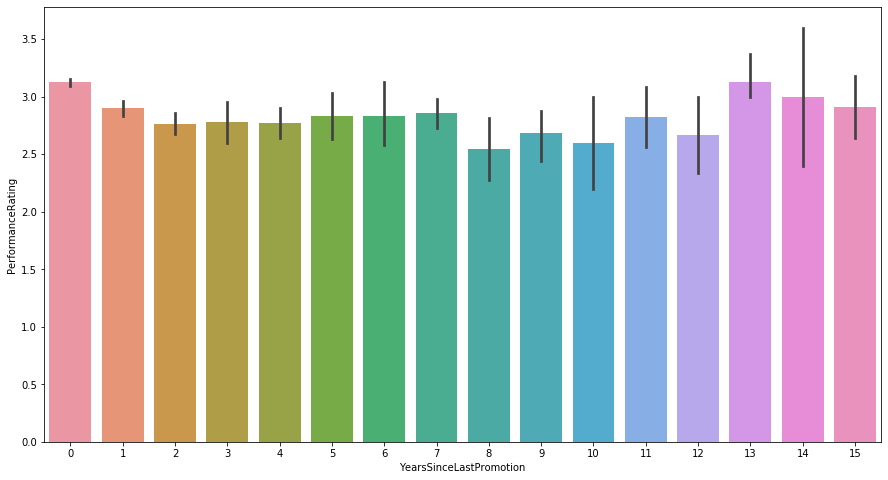

In [160]:
plt.figure(figsize=(15,8))
sns.barplot(x=df.YearsSinceLastPromotion,y=df.PerformanceRating,estimator=np.mean)

## EmpHourlyRate	

In [165]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

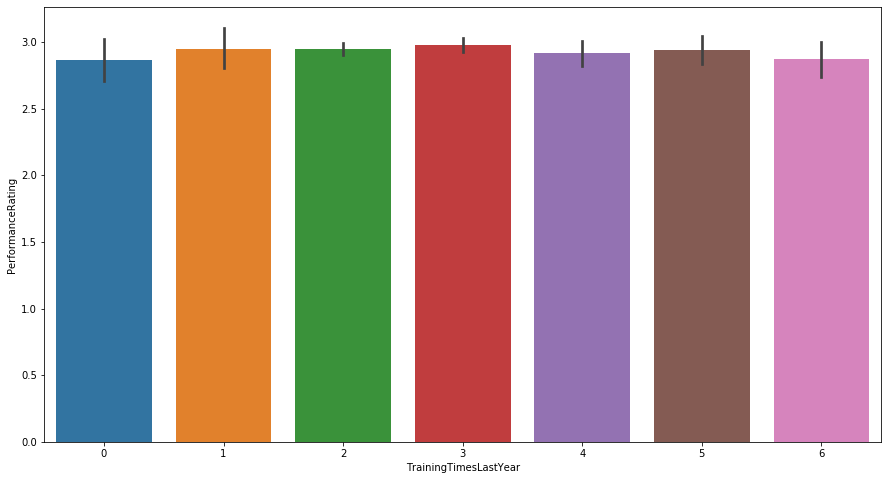

In [168]:
plt.figure(figsize=(15,8))
sns.barplot(x=df.TrainingTimesLastYear,y=df.PerformanceRating,estimator=np.mean)

Text(0.5, 1.0, 'Employee Department')

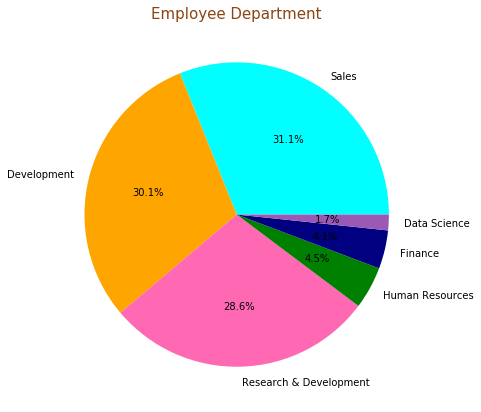

In [171]:
labels=df.EmpDepartment.value_counts().index
colors=["cyan","orange","hotpink","green","navy","#9b59b6"]
#explode=[0,0,0,0,0,0]
sizes=df.EmpDepartment.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title("Employee Department",color="saddlebrown",fontsize=15)

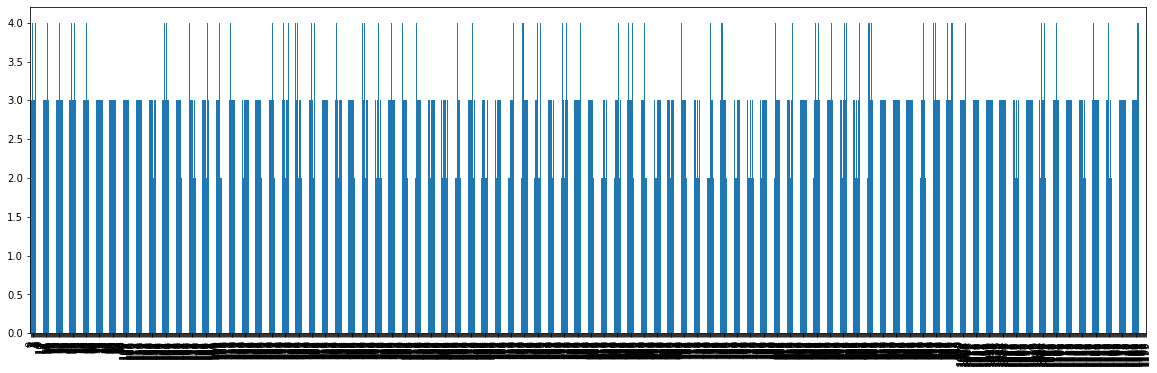

In [179]:
plt.figure(figsize=(20,6))
df['PerformanceRating'].plot(kind='bar')